*Going for a walk in the (random) forest.*

[Bookmarked](https://towardsdatascience.com/memory-management-in-python-6bea0c8aecc9) for later.

# Data exploration and modeling

### Import modules

In [92]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels
import ggplot
from ggplot import *

### Import, concatenate CSVs
I've decided to ignore size for now, but I don't want to remove the easily sourced information from the poshmark CSVs, so I'll just remove it here in the two poshmark dfs, and then I'll join all dfs.

In [44]:
new_eBay_lululemon_df = pd.read_csv('new_eBay_lululemon_df.csv', index_col=0)
po_eBay_lululemon_df = pd.read_csv('po_eBay_lululemon_df.csv', index_col=0)
new_eBay_ref_df = pd.read_csv('new_eBay_lululemon_df.csv', index_col=0)
po_eBay_ref_df = pd.read_csv('po_eBay_ref_df.csv', index_col=0)
pm_lululemon_df = pd.read_csv('pm_lululemon_df.csv', index_col=0)
pm_ref_df = pd.read_csv('pm_ref_df.csv', index_col=0)

del pm_lululemon_df['Size']
del pm_ref_df['Size']

# Join the CSVs by stacking them vertically (axis=0)
df = pd.concat([new_eBay_lululemon_df, po_eBay_lululemon_df, new_eBay_ref_df, 
                po_eBay_ref_df, pm_lululemon_df, pm_ref_df], axis=0)

In [10]:
print(len(df))
df.head()

77664


Summary  Price      Brand  \
0  sold  sep 16, 2019lululemon red padded sports ...  13.49  lululemon   
1  sold  sep 16, 2019nwt $128.00 lululemon on the...  64.00  lululemon   
2  sold  sep 16, 2019lululemon skinny will pant 2...  48.00  lululemon   
3  sold  sep 16, 2019lululemon hotty hot short sz...  41.00  lululemon   
4  sold  sep 16, 2019ladies lululemon tank flowy ...  16.00  lululemon   

  Condition Category  Site  
0       New     bras  eBay  
1       New  bottoms  eBay  
2       New  bottoms  eBay  
3       New  bottoms  eBay  
4       New     tops  eBay

#### Summary statistics

In [8]:
df.describe(include='all')

Summary         Price  \
count                                               77664  77664.000000   
unique                                                425           NaN   
top     sold  sep 16, 2019lululemon women’s speed up s...           NaN   
freq                                                 1631           NaN   
mean                                                  NaN     39.426102   
std                                                   NaN     31.860631   
min                                                   NaN      3.000000   
25%                                                   NaN     19.990000   
50%                                                   NaN     32.000000   
75%                                                   NaN     45.990000   
max                                                   NaN    259.000000   

            Brand Condition Category   Site  
count       77664     77664    77664  77664  
unique          2         2        9      2  
top     lululemon       New  bottoms   eBay  
freq        74016     48482    37052  73056  
mean          NaN       NaN      NaN    NaN  
std           NaN       NaN      NaN    NaN  
min           NaN       NaN      NaN    NaN  
25%           NaN       NaN      NaN    NaN  
50%           NaN       NaN      NaN    NaN  
75%           NaN       NaN      NaN    NaN  
max           NaN       NaN      NaN    NaN

Nothing looks terribly suspicious. Now for some visualization fun!

In [50]:
df_lulu = df.loc[df['Brand'] == 'lululemon']
df_ref = df.loc[df['Brand'] == 'Reformation']

#### plotly scatterplot (this kind of breaks my computer)

In [ ]:
fig = px.strip(df, x="Price", y="Site", orientation="h", color="Category")
fig.show()

#### plotly box plots

In [24]:
?px.box

In [30]:
# Brand = lululemon
fig = px.box(df_lulu, x="Category", y="Price", color="Site",
             color_discrete_sequence= px.colors.qualitative.Bold,
             title="Categorized item sale prices by site")
fig.show()

In [36]:
print(len(df_lulu.loc[df_lulu['Category'] == 'bag']))
print(len(df_lulu.loc[df_lulu['Category'] == 'accessories']))
print(len(df_lulu.loc[(df_lulu['Category'] == 'other') & (df_lulu['Site'] == 'Poshmark')]))

96
144
240


The plot above suggests the following data cleaning procedures for df_lulu:

- Remove rows where Category = 'dresses', 'bag', 'other', and 'accessories' 
- Remove rows where Category = 'bras' & Price > 50
- Remove rows where Category = 'bottoms', Site = 'eBay' & Price > 90
- Remove rows where Category = 'bottoms', Site = 'poshmark' & Price > 50
- Remove rows where Category = 'outerwear' & Price > 60

In [57]:
df_lulu_edit = df_lulu[(df_lulu.Category == 'dresses') | (df_lulu.Category == 'bag') | (df_lulu.Category == 'other') | (df_lulu.Category == 'accessories')].index
df_lulu.drop(df_lulu_edit, inplace=True)

In [60]:
df_lulu_edit = df_lulu[(df_lulu.Category == 'bras') & (df_lulu.Price > 50)].index
df_lulu.drop(df_lulu_edit, inplace=True)

In [ ]:
df_lulu_edit = df_lulu[(df_lulu.Category == 'bottoms') & (df_lulu.Site == 'eBay') & (df_lulu.Price > 90)].index
df_lulu.drop(df_lulu_edit, inplace=True)

In [66]:
df_lulu_edit = df_lulu[(df_lulu.Category == 'bottoms') & (df_lulu.Site == 'Poshmark') & (df_lulu.Price > 50)].index
df_lulu.drop(df_lulu_edit, inplace=True)

In [68]:
df_lulu_edit = df_lulu[(df_lulu.Category == 'outerwear') & (df_lulu.Price > 60)].index
df_lulu.drop(df_lulu_edit, inplace=True)
len(df_lulu)

57787

Redoing the box plot indicates that the data is nice and cleaned up for lululemon branded items.

In [69]:
# Brand = lululemon
fig = px.box(df_lulu, x="Category", y="Price", color="Site",
             color_discrete_sequence= px.colors.qualitative.Bold,
             title="Categorized item sale prices by site")
fig.show()

Now having a look at Reformation branded items...

In [70]:
# Brand = Reformation
fig = px.box(df_ref, x="Category", y="Price", color="Site",
             color_discrete_sequence= px.colors.qualitative.Prism,
             title="Categorized item sale prices by site")
fig.show()

The plot above suggests the following data cleaning procedures for df_ref:

- Remove rows where Category = 'other' or 'jumpsuits'
- Remove rows where Category = 'tops' & Price > 75

In [73]:
df_ref_edit = df_ref[(df_ref.Category == 'tops') & (df_ref.Price > 75)].index
df_ref.drop(df_ref_edit, inplace=True)

In [77]:
df_ref_edit = df_ref[(df_ref.Category == 'other') | (df_ref.Category == 'jumpsuits')].index
df_ref.drop(df_ref_edit, inplace=True)
len(df_ref)

2659

In [78]:
# Brand = Reformation
fig = px.box(df_ref, x="Category", y="Price", color="Site",
             color_discrete_sequence= px.colors.qualitative.Prism,
             title="Categorized item sale prices by site")
fig.show()

In [82]:
df = pd.concat([df_lulu, df_ref], axis=0)
print(len(df))

60446


In [81]:
df.head()

Summary  Price      Brand  \
2  sold  sep 16, 2019lululemon skinny will pant 2...  48.00  lululemon   
3  sold  sep 16, 2019lululemon hotty hot short sz...  41.00  lululemon   
4  sold  sep 16, 2019ladies lululemon tank flowy ...  16.00  lululemon   
5  sold  sep 16, 2019women’s lululemon tracker 3 ...  37.95  lululemon   
8           sold  sep 16, 2019lululemon 4 sports bra  15.00  lululemon   

  Condition Category  Site  
2       New  bottoms  eBay  
3       New  bottoms  eBay  
4       New     tops  eBay  
5       New  bottoms  eBay  
8       New     bras  eBay

#### Scatterplot

In [108]:
?geom_point

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

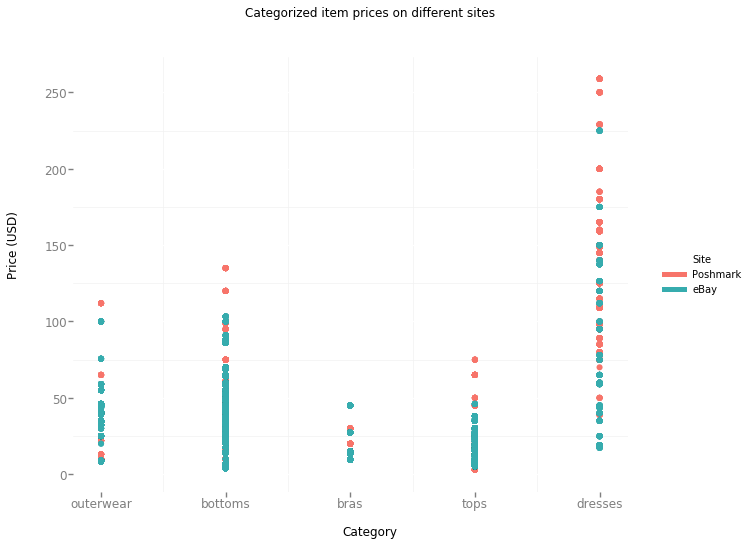

<ggplot: (8742274257805)>

In [113]:
ggplot(aes(x='Category', y='Price', color='Site'), data=df) +\
    geom_point(size=37, shape='o') +\
    geom_jitter() +\
    theme_bw() +\
    xlab("Category") +\
    ylab("Price (USD)") +\
    ggtitle("Categorized item prices on different sites")

Looks good. I don't see any wild outliers here, but there are some clear differences in categorical sale prices between sites.

In [115]:
pd.DataFrame.to_csv(df, 'cleaned_df.csv')

## Setting up to model things